In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install anesthetic
import os
os.chdir("/content/drive/MyDrive/project")

In [ ]:
import time
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import torch
import torch.nn as nn
import torch.distributions as dists
import torch.optim as optim
from torch.distributions import MultivariateNormal
from torch.distributions.distribution import Distribution
from np_utils import simple_data, curved_data, planck_des_data
from torch_utils import rotation_test, get_limits, TrainUtil
from tension_net import TensionNet, TensionNet1, TensionNet2, TensionNet3
from tension_quantify import GaussianKDE, BayesFactorKDE, BayesFactor

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
params = ["omegabh2", "omegam", "H0", "tau", "sigma8", "ns"]
param_pairs = []
for i in range(len(params)):
    for j in range(i + 1, len(params)):
        param_pairs.append([i, j])

In [ ]:
(X0, X0_weights, X1, X1_weights, X_prior, X_prior_weights,
 params, param_means, norm_factors) = planck_des_data(
     params=params, div_max=True
)
weights = { "XA": X0_weights, "XB": X1_weights, "X_prior": X_prior_weights }
param_means = torch.tensor(param_means).float().to(device)
norm_factors = torch.tensor(norm_factors).float().to(device)

In [ ]:
rand0 = torch.rand(X0_r.shape[0])
rand1 = torch.rand(X1_r.shape[0])
rand_prior = torch.rand(X_prior_r.shape[0])

rand0 = rand0

In [ ]:
utils = []

X0_r = X0.copy()
X1_r = X1.copy()
X_prior_r = X_prior.copy()
X0_r[:, 0] = rand0
X1_r[:, 0] = rand1
X_prior_r[:, 0] = rand_prior

for i in range(5):
    start = time.time()
    tension_R_cosmo = TensionNet1(6, hidden_size=4096)
    criterion = BayesFactorKDE(device, n_points=500)
    optimizer = optim.Adam(tension_R_cosmo.parameters(), lr=0.0001)

    train_util_R_cosmo = TrainUtil(tension_R_cosmo, optimizer, criterion, device)
    losses_R_cosmo = train_util_R_cosmo.train(X0_r, X1_r, X_prior_r, weights=weights,
                                                    n_iter=500, decrease_lr_at=[-8])
    print("Histogram time taken: ", time.time() - start, "Final Loss: ", losses_R_cosmo[-1])
    utils.append(train_util_R_cosmo)
    # torch.save(train_util_R_cosmo.net.state_dict(), f"nets/kde/six_{i}.pt")
    # np.savetxt(f"nets/kde/six_{i}_loss.csv", np.asarray(losses_R_cosmo), delimiter=',')

Histogram time taken:  41.54755663871765 Final Loss:  -10.971242904663086
Histogram time taken:  41.51120471954346 Final Loss:  -10.100139617919922
Histogram time taken:  41.46189737319946 Final Loss:  -12.221357345581055
Histogram time taken:  41.45308184623718 Final Loss:  -2.5956411361694336
Histogram time taken:  41.5173134803772 Final Loss:  -11.97555160522461


In [ ]:
utils = []

X0_r = X0.copy()
X1_r = X1.copy()
X_prior_r = X_prior.copy()
X0_r[:, 1] = rand0
X1_r[:, 1] = rand1
X_prior_r[:, 1] = rand_prior

for i in range(5):
    start = time.time()
    tension_R_cosmo = TensionNet1(6, hidden_size=4096)
    criterion = BayesFactorKDE(device, n_points=500)
    optimizer = optim.Adam(tension_R_cosmo.parameters(), lr=0.0001)

    train_util_R_cosmo = TrainUtil(tension_R_cosmo, optimizer, criterion, device)
    losses_R_cosmo = train_util_R_cosmo.train(X0_r, X1_r, X_prior_r, weights=weights,
                                                    n_iter=500, decrease_lr_at=[-8])
    print("Histogram time taken: ", time.time() - start, "Final Loss: ", losses_R_cosmo[-1])
    utils.append(train_util_R_cosmo)
    # torch.save(train_util_R_cosmo.net.state_dict(), f"nets/kde/six_{i}.pt")
    # np.savetxt(f"nets/kde/six_{i}_loss.csv", np.asarray(losses_R_cosmo), delimiter=',')

Histogram time taken:  41.42390012741089 Final Loss:  -3.05022931098938
Histogram time taken:  41.55856251716614 Final Loss:  -4.25863790512085
Histogram time taken:  41.48592185974121 Final Loss:  -4.896651268005371
Histogram time taken:  41.52720832824707 Final Loss:  -5.8341064453125
Histogram time taken:  41.47477436065674 Final Loss:  -5.975531578063965


In [ ]:
utils = []

X0_r = X0.copy()
X1_r = X1.copy()
X_prior_r = X_prior.copy()
X0_r[:, 2] = rand0
X1_r[:, 2] = rand1
X_prior_r[:, 2] = rand_prior

for i in range(5):
    start = time.time()
    tension_R_cosmo = TensionNet1(6, hidden_size=4096)
    criterion = BayesFactorKDE(device, n_points=500)
    optimizer = optim.Adam(tension_R_cosmo.parameters(), lr=0.0001)

    train_util_R_cosmo = TrainUtil(tension_R_cosmo, optimizer, criterion, device)
    losses_R_cosmo = train_util_R_cosmo.train(X0_r, X1_r, X_prior_r, weights=weights,
                                                    n_iter=500, decrease_lr_at=[-8])
    print("Histogram time taken: ", time.time() - start, "Final Loss: ", losses_R_cosmo[-1])
    utils.append(train_util_R_cosmo)
    # torch.save(train_util_R_cosmo.net.state_dict(), f"nets/kde/six_{i}.pt")
    # np.savetxt(f"nets/kde/six_{i}_loss.csv", np.asarray(losses_R_cosmo), delimiter=',')

Histogram time taken:  41.377777099609375 Final Loss:  -2.8829948902130127
Histogram time taken:  41.48959398269653 Final Loss:  -13.212780952453613
Histogram time taken:  41.434102058410645 Final Loss:  -13.019692420959473
Histogram time taken:  41.46204853057861 Final Loss:  -12.320771217346191
Histogram time taken:  41.521507263183594 Final Loss:  -11.169971466064453


In [ ]:
utils = []

X0_r = X0.copy()
X1_r = X1.copy()
X_prior_r = X_prior.copy()
X0_r[:, 3] = rand0
X1_r[:, 3] = rand1
X_prior_r[:, 3] = rand_prior

for i in range(5):
    start = time.time()
    tension_R_cosmo = TensionNet1(6, hidden_size=4096)
    criterion = BayesFactorKDE(device, n_points=500)
    optimizer = optim.Adam(tension_R_cosmo.parameters(), lr=0.0001)

    train_util_R_cosmo = TrainUtil(tension_R_cosmo, optimizer, criterion, device)
    losses_R_cosmo = train_util_R_cosmo.train(X0_r, X1_r, X_prior_r, weights=weights,
                                                    n_iter=500, decrease_lr_at=[-8])
    print("Histogram time taken: ", time.time() - start, "Final Loss: ", losses_R_cosmo[-1])
    utils.append(train_util_R_cosmo)
    # torch.save(train_util_R_cosmo.net.state_dict(), f"nets/kde/six_{i}.pt")
    # np.savetxt(f"nets/kde/six_{i}_loss.csv", np.asarray(losses_R_cosmo), delimiter=',')

Histogram time taken:  41.39449882507324 Final Loss:  -4.853936672210693
Histogram time taken:  41.42276668548584 Final Loss:  -5.025251865386963
Histogram time taken:  41.45122838020325 Final Loss:  -3.5487449169158936
Histogram time taken:  41.433799028396606 Final Loss:  -5.059995174407959
Histogram time taken:  41.460936307907104 Final Loss:  -5.774997234344482


In [ ]:
utils = []

X0_r = X0.copy()
X1_r = X1.copy()
X_prior_r = X_prior.copy()
X0_r[:, 4] = rand0
X1_r[:, 4] = rand1
X_prior_r[:, 4] = rand_prior

for i in range(5):
    start = time.time()
    tension_R_cosmo = TensionNet1(6, hidden_size=4096)
    criterion = BayesFactorKDE(device, n_points=500)
    optimizer = optim.Adam(tension_R_cosmo.parameters(), lr=0.0001)

    train_util_R_cosmo = TrainUtil(tension_R_cosmo, optimizer, criterion, device)
    losses_R_cosmo = train_util_R_cosmo.train(X0_r, X1_r, X_prior_r, weights=weights,
                                                    n_iter=500, decrease_lr_at=[-8])
    print("Histogram time taken: ", time.time() - start, "Final Loss: ", losses_R_cosmo[-1])
    utils.append(train_util_R_cosmo)
    # torch.save(train_util_R_cosmo.net.state_dict(), f"nets/kde/six_{i}.pt")
    # np.savetxt(f"nets/kde/six_{i}_loss.csv", np.asarray(losses_R_cosmo), delimiter=',')

Histogram time taken:  41.44821333885193 Final Loss:  -10.779474258422852
Histogram time taken:  41.46468424797058 Final Loss:  -9.499238967895508
Histogram time taken:  41.526766777038574 Final Loss:  -9.653779983520508
Histogram time taken:  41.39574670791626 Final Loss:  -9.941048622131348
Histogram time taken:  41.39097261428833 Final Loss:  -15.295500755310059


In [ ]:
utils = []

X0_r = X0.copy()
X1_r = X1.copy()
X_prior_r = X_prior.copy()
X0_r[:, 5] = rand0
X1_r[:, 5] = rand1
X_prior_r[:, 5] = rand_prior

for i in range(5):
    start = time.time()
    tension_R_cosmo = TensionNet1(6, hidden_size=4096)
    criterion = BayesFactorKDE(device, n_points=500)
    optimizer = optim.Adam(tension_R_cosmo.parameters(), lr=0.0001)

    train_util_R_cosmo = TrainUtil(tension_R_cosmo, optimizer, criterion, device)
    losses_R_cosmo = train_util_R_cosmo.train(X0_r, X1_r, X_prior_r, weights=weights,
                                                    n_iter=500, decrease_lr_at=[-8])
    print("Histogram time taken: ", time.time() - start, "Final Loss: ", losses_R_cosmo[-1])
    utils.append(train_util_R_cosmo)
    # torch.save(train_util_R_cosmo.net.state_dict(), f"nets/kde/six_{i}.pt")
    # np.savetxt(f"nets/kde/six_{i}_loss.csv", np.asarray(losses_R_cosmo), delimiter=',')

In [ ]:
utils = []

X0_r = np.delete(X0, 0, axis=1)
X1_r = np.delete(X1, 0, axis=1)
X_prior_r = np.delete(X_prior, 0, axis=1)

for i in range(5):
    start = time.time()
    tension_R_cosmo = TensionNet1(5, hidden_size=4096)
    criterion = BayesFactorKDE(device, n_points=500)
    optimizer = optim.Adam(tension_R_cosmo.parameters(), lr=0.0001)

    train_util_R_cosmo = TrainUtil(tension_R_cosmo, optimizer, criterion, device)
    losses_R_cosmo = train_util_R_cosmo.train(X0_r, X1_r, X_prior_r, weights=weights,
                                                    n_iter=500, decrease_lr_at=[-8])
    print("Histogram time taken: ", time.time() - start, "Final Loss: ", losses_R_cosmo[-1])
    utils.append(train_util_R_cosmo)
    # torch.save(train_util_R_cosmo.net.state_dict(), f"nets/kde/six_{i}.pt")
    # np.savetxt(f"nets/kde/six_{i}_loss.csv", np.asarray(losses_R_cosmo), delimiter=',')

Histogram time taken:  73.65446448326111 Final Loss:  -12.590862274169922
Histogram time taken:  73.73634719848633 Final Loss:  -1.498138189315796
Histogram time taken:  73.7051408290863 Final Loss:  -10.846750259399414
Histogram time taken:  73.67041206359863 Final Loss:  -11.81391429901123
Histogram time taken:  73.68580198287964 Final Loss:  -2.6033823490142822


In [ ]:
utils = []

X0_r = np.delete(X0, 1, axis=1)
X1_r = np.delete(X1, 1, axis=1)
X_prior_r = np.delete(X_prior, 1, axis=1)

for i in range(5):
    start = time.time()
    tension_R_cosmo = TensionNet1(5, hidden_size=4096)
    criterion = BayesFactorKDE(device, n_points=500)
    optimizer = optim.Adam(tension_R_cosmo.parameters(), lr=0.0001)

    train_util_R_cosmo = TrainUtil(tension_R_cosmo, optimizer, criterion, device)
    losses_R_cosmo = train_util_R_cosmo.train(X0_r, X1_r, X_prior_r, weights=weights,
                                                    n_iter=500, decrease_lr_at=[-8])
    print("Histogram time taken: ", time.time() - start, "Final Loss: ", losses_R_cosmo[-1])
    utils.append(train_util_R_cosmo)
    # torch.save(train_util_R_cosmo.net.state_dict(), f"nets/kde/six_{i}.pt")
    # np.savetxt(f"nets/kde/six_{i}_loss.csv", np.asarray(losses_R_cosmo), delimiter=',')

Histogram time taken:  73.7110755443573 Final Loss:  -3.094749689102173
Histogram time taken:  73.5590467453003 Final Loss:  -12.477018356323242
Histogram time taken:  73.46433448791504 Final Loss:  -12.31637191772461


KeyboardInterrupt: ignored

In [ ]:
utils = []

X0_r = np.delete(X0, 2, axis=1)
X1_r = np.delete(X1, 2, axis=1)
X_prior_r = np.delete(X_prior, 2, axis=1)

for i in range(5):
    start = time.time()
    tension_R_cosmo = TensionNet1(5, hidden_size=4096)
    criterion = BayesFactorKDE(device, n_points=500)
    optimizer = optim.Adam(tension_R_cosmo.parameters(), lr=0.0001)

    train_util_R_cosmo = TrainUtil(tension_R_cosmo, optimizer, criterion, device)
    losses_R_cosmo = train_util_R_cosmo.train(X0_r, X1_r, X_prior_r, weights=weights,
                                                    n_iter=500, decrease_lr_at=[-8])
    print("Histogram time taken: ", time.time() - start, "Final Loss: ", losses_R_cosmo[-1])
    utils.append(train_util_R_cosmo)
    # torch.save(train_util_R_cosmo.net.state_dict(), f"nets/kde/six_{i}.pt")
    # np.savetxt(f"nets/kde/six_{i}_loss.csv", np.asarray(losses_R_cosmo), delimiter=',')

In [ ]:
utils = []

X0_r = np.delete(X0, 3, axis=1)
X1_r = np.delete(X1, 3, axis=1)
X_prior_r = np.delete(X_prior, 3, axis=1)

for i in range(5):
    start = time.time()
    tension_R_cosmo = TensionNet1(5, hidden_size=4096)
    criterion = BayesFactorKDE(device, n_points=500)
    optimizer = optim.Adam(tension_R_cosmo.parameters(), lr=0.0001)

    train_util_R_cosmo = TrainUtil(tension_R_cosmo, optimizer, criterion, device)
    losses_R_cosmo = train_util_R_cosmo.train(X0_r, X1_r, X_prior_r, weights=weights,
                                                    n_iter=500, decrease_lr_at=[-8])
    print("Histogram time taken: ", time.time() - start, "Final Loss: ", losses_R_cosmo[-1])
    utils.append(train_util_R_cosmo)
    # torch.save(train_util_R_cosmo.net.state_dict(), f"nets/kde/six_{i}.pt")
    # np.savetxt(f"nets/kde/six_{i}_loss.csv", np.asarray(losses_R_cosmo), delimiter=',')

In [ ]:
utils = []

X0_r = np.delete(X0, 4, axis=1)
X1_r = np.delete(X1, 4, axis=1)
X_prior_r = np.delete(X_prior, 4, axis=1)

for i in range(5):
    start = time.time()
    tension_R_cosmo = TensionNet1(5, hidden_size=4096)
    criterion = BayesFactorKDE(device, n_points=500)
    optimizer = optim.Adam(tension_R_cosmo.parameters(), lr=0.0001)

    train_util_R_cosmo = TrainUtil(tension_R_cosmo, optimizer, criterion, device)
    losses_R_cosmo = train_util_R_cosmo.train(X0_r, X1_r, X_prior_r, weights=weights,
                                                    n_iter=500, decrease_lr_at=[-8])
    print("Histogram time taken: ", time.time() - start, "Final Loss: ", losses_R_cosmo[-1])
    utils.append(train_util_R_cosmo)
    # torch.save(train_util_R_cosmo.net.state_dict(), f"nets/kde/six_{i}.pt")
    # np.savetxt(f"nets/kde/six_{i}_loss.csv", np.asarray(losses_R_cosmo), delimiter=',')

In [ ]:
utils = []

X0_r = np.delete(X0, 5, axis=1)
X1_r = np.delete(X1, 5, axis=1)
X_prior_r = np.delete(X_prior, 5, axis=1)

for i in range(5):
    start = time.time()
    tension_R_cosmo = TensionNet1(5, hidden_size=4096)
    criterion = BayesFactorKDE(device, n_points=500)
    optimizer = optim.Adam(tension_R_cosmo.parameters(), lr=0.0001)

    train_util_R_cosmo = TrainUtil(tension_R_cosmo, optimizer, criterion, device)
    losses_R_cosmo = train_util_R_cosmo.train(X0_r, X1_r, X_prior_r, weights=weights,
                                                    n_iter=500, decrease_lr_at=[-8])
    print("Histogram time taken: ", time.time() - start, "Final Loss: ", losses_R_cosmo[-1])
    utils.append(train_util_R_cosmo)
    # torch.save(train_util_R_cosmo.net.state_dict(), f"nets/kde/six_{i}.pt")
    # np.savetxt(f"nets/kde/six_{i}_loss.csv", np.asarray(losses_R_cosmo), delimiter=',')

In [ ]:
all_losses = []

for pair in param_pairs:
    losses_set = []
    X0_r = np.delete(X0, pair, axis=1)
    X1_r = np.delete(X1, pair, axis=1)
    X_prior_r = np.delete(X_prior, pair, axis=1)

    for i in range(5):
        start = time.time()
        tension_R_cosmo = TensionNet1(4, hidden_size=4096)
        criterion = BayesFactorKDE(device, n_points=500)
        optimizer = optim.Adam(tension_R_cosmo.parameters(), lr=0.0001)

        train_util_R_cosmo = TrainUtil(tension_R_cosmo, optimizer, criterion, device)
        losses_R_cosmo = train_util_R_cosmo.train(X0_r, X1_r, X_prior_r, weights=weights,
                                                        n_iter=500)
        losses_set.append(losses_R_cosmo)
    
    all_losses.append(losses_set)
    print(pair, losses_set[-1])

[0, 1] [[0.05075263977050781, -0.5355334281921387, -1.248530387878418, -1.7934002876281738, -1.9076645374298096, -2.040731906890869, -2.2137515544891357, -2.2972395420074463, -2.1638035774230957, -2.127545118331909, -2.2209153175354004, -2.3102898597717285, -2.336517572402954, -2.3276848793029785, -2.339729070663452, -2.387765407562256, -2.4434335231781006, -2.4613475799560547, -2.476212739944458, -2.5161948204040527, -2.5799856185913086, -2.644559383392334, -2.6848442554473877, -2.692007064819336, -2.725877285003662, -2.8130903244018555, -2.8665528297424316, -2.8941993713378906, -2.9470274448394775, -2.996990442276001, -3.0433833599090576, -3.1079940795898438, -3.0776419639587402, -3.1307413578033447, -3.120162010192871, -3.1535558700561523, -3.1225385665893555, -3.1833102703094482, -3.1716415882110596, -3.223457098007202, -3.2585747241973877, -3.3072993755340576, -3.3143229484558105, -3.342500686645508, -3.395620346069336, -3.386319875717163, -3.385850667953491, -3.4354774951934814, 

In [ ]:
all_losses = np.array(all_losses)
np.savez("pair_remove.npz", all_losses)

In [ ]:
all_losses = np.load("pair_remove.npz")["arr_0"]

In [ ]:
for loss_set in all_losses:
    mins = []
    for loss in loss_set:
        moving_average = [np.average(loss[i - 100:i]) for i in range(100, len(loss))]
        mins.append(min(moving_average))
    print(mins)

[-5.399197025299072, -5.5409812521934505, -7.710892457962036, -8.17812243938446, -7.846481637954712]
[-7.712228817939758, -4.896445555686951, -8.30795530796051, -7.962810420989991, -7.367619361877441]
[-7.873981704711914, -4.060917897224426, -3.5815283131599425, -7.587059073448181, -7.685239615440369]
[-6.650065407752991, -1.5316022157669067, -6.159919028282165, -7.014370241165161, -7.3549534034729005]
[-2.5065407824516295, -10.173528881072999, -9.338449158668517, -7.771616950035095, -2.8360689210891725]
[-5.909962825775146, -2.6984344863891603, -2.42458637714386, -5.403551914691925, -4.946464161872864]
[-3.7964901876449586, -5.043455424308777, -4.017946026325226, -4.115287244319916, -4.164322071075439]
[-6.926919369697571, -6.90102171421051, -6.891470370292663, -7.185242128372193, -6.223630366325378]
[-5.81972252368927, -3.079670922756195, -5.7829986929893495, -2.898560571670532, -6.544755735397339]
[-9.266675596237183, -9.503049383163452, -3.68223491191864, -4.338339869976044, -4.036

In [ ]:
moving_averages

[]

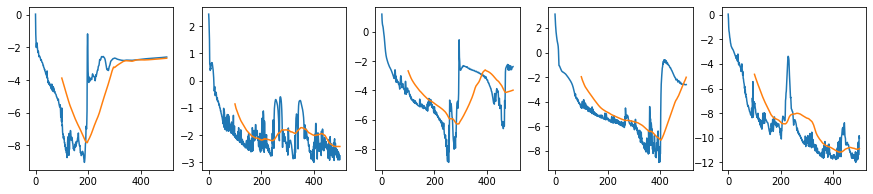

In [ ]:
fig, axs = plt.subplots(1, 5, figsize=(15, 3))

for i, loss in enumerate(all_losses[11]):
    axs[i].plot(loss)
    moving_average = [np.average(loss[i - 100:i]) for i in range(100, len(loss))]
    axs[i].plot(range(100, len(loss)), moving_average)

In [ ]:
pair = (0, 1)
losses_set = []
X0_r = np.delete(X0, pair, axis=1)
X1_r = np.delete(X1, pair, axis=1)
X_prior_r = np.delete(X_prior, pair, axis=1)

start = time.time()
tension_R_cosmo = TensionNet1(4, hidden_size=4096)
criterion = BayesFactorKDE(device, n_points=500)
optimizer = optim.Adam(tension_R_cosmo.parameters(), lr=0.00005)

train_util_R_cosmo = TrainUtil(tension_R_cosmo, optimizer, criterion, device)
losses_R_cosmo = train_util_R_cosmo.train(X0_r, X1_r, X_prior_r, weights=weights,
                                                n_iter=1000)

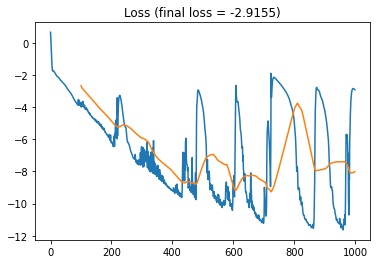

In [ ]:
fig, axs = plt.subplots()
train_util_R_cosmo.plot_loss(axs)
loss = train_util_R_cosmo.losses
moving_average = [np.average(loss[i - 100:i]) for i in range(100, len(loss))]
plt.plot(range(100, len(loss)), moving_average)